In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading MNIST dataset from Keras

**MNIST** is the *Modified National Institute of Standards and Technology* dataset.  

It is a classic benchmark for handwritten digit recognition.  

- **60,000** training images  
- **10,000** test images  

**Each image:**
- Size: `28×28` pixels  
- Grayscale (1 channel)  
- Labels: Digits `0–9`  


In [2]:
from keras.datasets import mnist

(x_train, y_train) , (x_test , y_test) = mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


The label(output) of this image is:  5


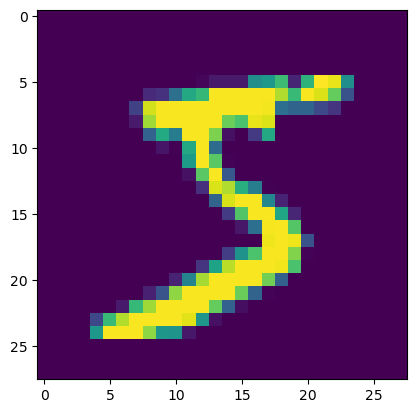

In [3]:
# Displaying the 1st image and its label

plt.imshow(x_train[0])
print('The label(output) of this image is: ', y_train[0])

## LeNet-5 Architecture

In [4]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras import Sequential

In [5]:
model = Sequential()

# The original shape in LeNet-5 is (32x32), but we have a different input shape for MNIST image, which is shape (28x28)
model.add(Conv2D(6, kernel_size = (5, 5), padding = 'valid', activation = 'tanh', input_shape = (28, 28, 1)))   
model.add(AveragePooling2D(pool_size = (2, 2), padding = 'valid', strides = 2))

model.add(Conv2D(16, kernel_size = (5, 5), padding = 'valid', activation = 'tanh'))
model.add(AveragePooling2D(pool_size = (2, 2), padding = 'valid', strides = 2))

model.add(Flatten())

model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))


model.summary()

C:\Users\HARSH\OneDrive\Documents\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compling the model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), batch_size = 32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8982 - loss: 0.3397 - val_accuracy: 0.9823 - val_loss: 0.0553
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9791 - loss: 0.0682 - val_accuracy: 0.9802 - val_loss: 0.0593
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9852 - loss: 0.0491 - val_accuracy: 0.9854 - val_loss: 0.0441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9873 - loss: 0.0398 - val_accuracy: 0.9860 - val_loss: 0.0439
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9863 - val_loss: 0.0436
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9872 - val_loss: 0.0417
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9865 - val_loss: 0.0429
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9932 - loss: 0

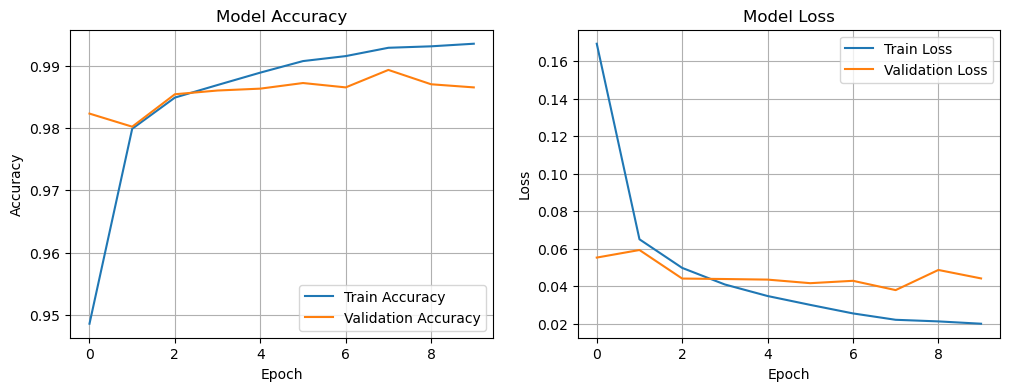

In [7]:
# Ploting Accuracy & Loss
plt.figure(figsize=(12, 4))

# Ploting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Ploting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

## Model on testing data

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print('\nModel\'s performance on Testing data:', '\nLoss(sparse_categorical_crossentropy): ', loss, '\nAccuray(%): ', accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0526

Model's performance on Testing data: 
Loss(sparse_categorical_crossentropy):  0.04420631751418114 
Accuray(%):  98.65000247955322


The label for this images is:  7


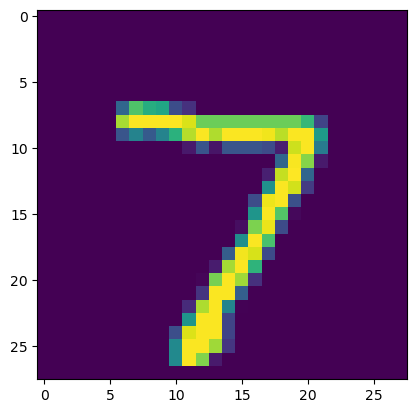

In [9]:
# Printing the 1st image in test data

plt.imshow(x_test[0])
print('The label for this images is: ', y_test[0])

In [10]:
# Predicting output for this 1st image of test data

img = x_test[0].reshape(1, 28, 28, 1)    # Adding batch & channel dimension, cause model expects input of shape (batch_size, 28, 28, channel_size)
pred0 = model.predict(img)
print('Prediction for this image is: ', np.argmax(pred0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediction for this image is:  7
